In [90]:
library(NELSI)
source('mcmc_IS_autocor.R')

In [91]:
IS.raw <- read.csv("~/Downloads/global_binary_chromosome_summary_ancReconstruction_ace_250116.csv")
IS.copy.no <- apply(IS.raw[,4:ncol(IS.raw)], 2, sum)
# lets rename the internal branches to be 133 etc without the X's
names(IS.copy.no) <- c(names(IS.copy.no)[1:132], seq(133, 263))
tree <- read.tree("~/Downloads/shigella_sonnei_noLinIV_NatureGen.tree")
tree <- ladderize(tree)
# get the times at each node and that the root is time 0
tree.times <- abs(allnode.times(tree) - max(allnode.times(tree)))
# read in the metadata to get the names of isolate sin each lineage
meta <- read.csv("~/Downloads/metadata_summary_chromosome.csv")
lin1 <- as.character(meta[which(meta$lineage == "I"),]$isolate)
lin2 <- as.character(meta[which(meta$lineage == "II"),]$isolate)
lin3 <- as.character(meta[which(meta$lineage == "III"),]$isolate)
# create the lineage I tree
lin1_tree <- drop.tip(tree, c(lin2, lin3))
lin1_tree <- ladderize(lin1_tree)
lin1_path <- get.descending.nodes.branches(tree, 134)$descending.nodes
# both of these are named vectors, with the original names from the original tree
lin1_copies <- IS.copy.no[lin1_path]
lin1_times <- tree.times[lin1_path]
# rename the vectors with the new names in the lineage I only tree
new.node.tip.names <- get.descending.nodes.branches(lin1_tree, 19)$descending.nodes
names(lin1_copies) <- new.node.tip.names
names(lin1_times) <- new.node.tip.names

In [107]:
#allnode.times(lin1_tree)
lin1_copies <- lin1_copies[order(as.numeric(names(lin1_copies)))]
range(allnode.times(lin1_tree))

[1]   0.0000 172.6727

In [123]:
n_steps <- 10000
start_par <- c(5, 3, 2)
basic_variance <- 20
start_likelihood <- likelihood_function(lin1_tree, lin1_copies, start_par, basic_variance)
start_likelihood

[1] -1346.446

In [94]:
start_prior <- prior_function(start_par)
start_prior
start_posterior <- start_likelihood + start_prior
start_posterior

[1] -207.8267

[1] -214.8267

In [97]:
m1 <- run_mcmc(tree = lin1_tree, is_observed = lin1_copies, start_par = c(1, 1, 1), n_steps = 100, basic_variance = .1)

[1]  10.0000000  -7.0000000 -28.3485669 -35.3485669   1.1183050   0.5217532   0.6406539
[1]  20.00000000  -7.00000000  -8.04044546 -15.04044546   0.94502970   0.33668987   0.06538374
[1]  30.0000000  -7.0000000  -9.0277340 -16.0277340   0.9183044   0.3644225   0.1549865
[1]  40.0000000  -7.0000000  -8.7568705 -15.7568705   0.7734454   0.3623426   0.1363948
[1]  50.0000000  -7.0000000  -8.6726879 -15.6726879   0.6507996   0.5711819   0.1300764
[1]  60.00000000  -7.00000000  -7.83192188 -14.83192188   0.88044872   0.65025019   0.01022553
[1]  70.00000000  -7.00000000  -7.85470329 -14.85470329   0.67357886   0.66197597   0.02366833
[1]  80.0000000  -7.0000000  -9.0541907 -16.0541907   0.5531783   0.3078963   0.1566842
[1]  90.0000000  -7.0000000  -8.5203820 -15.5203820   0.9137365   0.4443185   0.1177869
[1] 100.0000000  -7.0000000  -8.3479896 -15.3479896   0.8511365   0.3515924   0.1021074


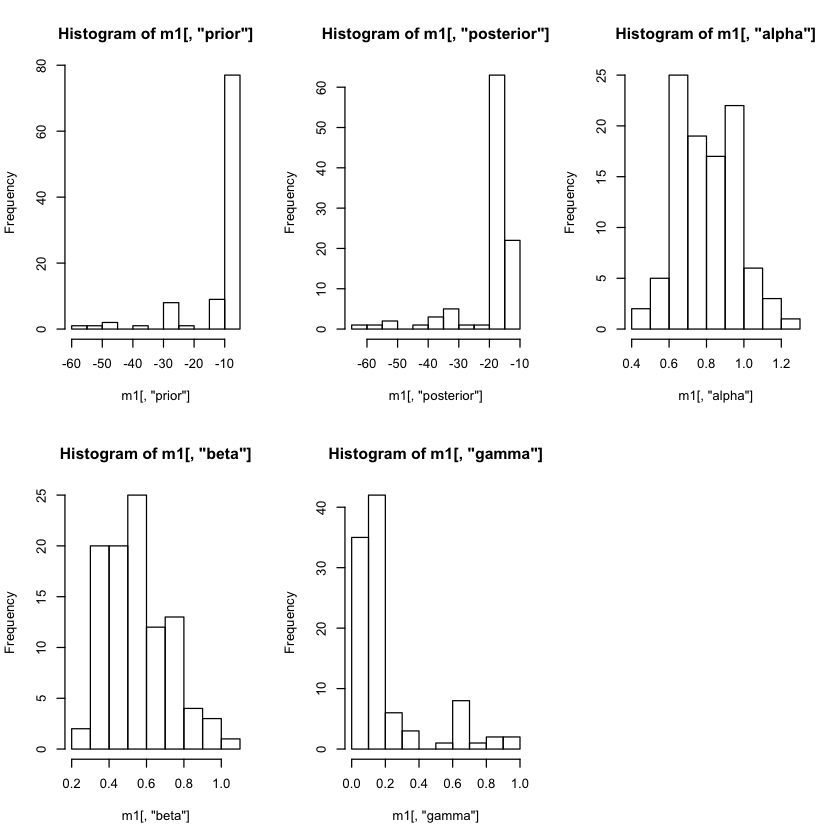

In [102]:
par(mfrow = c(2, 3))
hist(m1[, 'prior'])
hist(m1[, 'posterior'])
hist(m1[, 'alpha'])
hist(m1[, 'beta'])
hist(m1[, 'gamma'])